In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
data = pd.read_csv('expert_bio_complete.csv')

In [3]:
def find_target(text, word_list, default = 'Y'):
    other = {'Y', 'N'} - set(default)
    try: lower = text.lower()
    except AttributeError: return 'U'
    for i in word_list:
        if i in text.lower(): return default
    return list(other)[0]

In [4]:
data['bio'] = data[['education', 'experience']].apply(lambda x: str(x[0])+''+str(x[1]), axis=1)

In [5]:
tar_words = ['non-resident', 'nonresident', 'visiting', 
             'research associate', 'research assistant', 'intern', 'part-time']
data['is_resident'] = data['title'].apply(lambda x: find_target(x, tar_words, default = 'N'))
tar_words = ['senior', 'distinguished']
data['is_senior'] = data['title'].apply(lambda x: find_target(x, tar_words))
tar_words = ['president', 'director', 'chair', 'chief']
data['is_leadership'] = data['title'].apply(lambda x: find_target(x, tar_words))

In [6]:
tar_words = ['phd', 'ph.d', 'dr. ', 'doctora', 'ph. d.']
data['is_phd'] = data['bio'].apply(lambda x: find_target(x, tar_words))

tar_words = ['law school', 'law degree', 'jd', 'j.d', 'school of law', 'juris doctor']
data['is_law'] = data['bio'].apply(lambda x: find_target(x, tar_words))

In [7]:
data.to_csv('expert_bio_complete.csv', index=False)

In [13]:
orgs = set(data['institution'])
for o in orgs:
    print(o, len(data[data['institution']==o]))

aei 126
brookings 414
cap 338
heritage 273


In [5]:
type_data = pd.read_csv('complete_data.csv')
print(set(type_data['type']))
tar_experts = type_data[type_data['type'].isin([np.nan, 
                                                'experts'])]['expert_id']

{nan, 'N', 'other', 'experts', 'leadership'}


In [8]:
expert_data = data[data['expert_id'].isin(tar_experts)]

In [22]:
merged = expert_data.merge(type_data[['expert_id', 'twitter']], on = 'expert_id').drop_duplicates()
len(merged), len(set(merged['expert_id']))

(865, 865)

In [23]:
merged

,expert_id,name,institution,title,education,experience,num_opinions,num_testimony,num_press,num_external,is_resident,is_senior,is_leadership,is_phd,is_law,bio,twitter
0,samuel-j-abrams,Samuel J. Abrams,aei,Visiting Scholar,"Ph.D., M.A., political science and government,...","Research Fellow, The Hoover Institution, 2012–...",85,0,9,0,N,N,N,Y,N,"Ph.D., M.A., political science and government,...",SamuelAbramsAEI
1,joseph-antos,Joseph Antos,aei,Wilson H. Taylor Scholar in Health Care and Re...,"PhD, MA, economics, University of Rochester\nB...",George Washington University: Adjunct Associat...,144,0,34,0,Y,N,N,Y,N,"PhD, MA, economics, University of Rochester\nB...",joeantos
2,leon-aron,Leon Aron,aei,"Resident Scholar; Director, Russian Studies","PhD, political sociology, MA, media sociology,...","Broadcasting Board of Governors: Governor, 201...",380,0,65,0,Y,N,Y,Y,N,"PhD, political sociology, MA, media sociology,...",AronRTTT
3,kirsten-axelsen,Kirsten Axelsen,aei,Visiting Fellow,"Executive Education, Harvard Business School\n...","Pfizer Inc: Vice President, Strategy and New B...",15,0,3,0,N,N,N,N,N,"Executive Education, Harvard Business School\n...",kjacny
4,john-bailey,John P. Bailey,aei,Visiting Fellow,Senior Executives in State and Local Governmen...,"Fellow, Walton Family Foundation, 2017–present...",55,0,2,1,N,N,N,N,N,Senior Executives in State and Local Governmen...,John_Bailey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,ahmed-osub,Osub Ahmed,cap,"Senior Policy Analyst, Women’s Health and Rights",Osub Ahmed is a senior policy analyst for wome...,Osub Ahmed is a senior policy analyst for wome...,33,0,0,0,Y,Y,N,N,N,Osub Ahmed is a senior policy analyst for wome...,osubahmed
927,bleiweis-robin,Robin Bleiweis,cap,"Research Associate, Women’s Economic Security",Robin Bleiweis is a research associate for wom...,Robin Bleiweis is a research associate for wom...,13,0,0,0,N,N,N,N,N,Robin Bleiweis is a research associate for wom...,-1
928,boesch-diana,Diana Boesch,cap,"Policy Analyst, Women’s Economic Security",Diana Boesch is a policy analyst for women’s e...,Diana Boesch is a policy analyst for women’s e...,36,0,0,0,Y,N,N,N,N,Diana Boesch is a policy analyst for women’s e...,-1
929,ellmann-nora,Nora Ellmann,cap,"Research Associate, Women’s Health and Rights",Nora Ellmann is a research associate for women...,Nora Ellmann is a research associate for women...,22,0,0,0,N,N,N,N,N,Nora Ellmann is a research associate for women...,-1


In [60]:
len(merged[(merged['institution']=='heritage') & 
       (merged['twitter']=='-1')])

609

In [62]:
for i in ['is_resident', 'is_senior', 'is_leadership', 'is_phd', 'is_law']:
    print(i, len(merged[(merged[i]=='Y') 
           & (merged['twitter']!='-1')
          ]))

is_resident 372
is_senior 272
is_leadership 131
is_phd 281
is_law 113


In [29]:
data = pd.read_csv('expert_bio_complete.csv')
tar_data = data[data['expert_id'].isin()]

0.6949152542372882

In [30]:
len(data[(~data['type'].isna()) & (data['twitter']!='-1')])/ len(data[data['type'].isna()])

0.23728813559322035

In [130]:
merged[merged['institution']=='brookings']

,expert_id,name,institution,title,education,experience,num_opinions,num_testimony,num_press,num_external,is_resident,is_senior,is_leadership,is_phd,is_law,bio,twitter
126,henry-j-aaron,Henry J. Aaron,brookings,The Bruce and Virginia MacLaury Chair,"['Ph.D. (1963), M.A. (1960), Harvard Universit...","['Member, Visiting Committee, Harvard Medical ...",255,16,0,9,Y,N,Y,Y,N,"['Ph.D. (1963), M.A. (1960), Harvard Universit...",-1
127,stephanie-aaronson,Stephanie Aaronson,brookings,Vice President and Director - Economic Studies,"['Ph.D. in Economics – Columbia University', '...","['Assistant Director, Division of Research and...",14,0,0,0,Y,N,Y,Y,N,"['Ph.D. in Economics – Columbia University', '...",-1
128,geneive-abdo,Geneive Abdo,brookings,Visiting Fellow - Brookings Doha Center,"['Fellow in MA Program, Department of Near Eas...","['Visiting Fellow, Brookings Doha Center', 'Le...",13,0,0,22,N,N,N,N,N,"['Fellow in MA Program, Department of Near Eas...",AbdoGeneive
129,noha-aboueldahab,Noha Aboueldahab,brookings,"Fellow - Foreign Policy, Brookings Doha Center","['Ph.D., Law - Durham Law School, University o...","['Research Project Manager, Rule of Law in Qat...",18,0,0,23,Y,N,N,Y,Y,"['Ph.D., Law - Durham Law School, University o...",NohaAboueldahab
130,yasmina-abouzzohour,Yasmina Abouzzohour,brookings,Visiting Fellow - Brookings Doha Center,"['Phd in Politics, University of Oxford (2019)...","['Visiting Fellow, Brookings Doha Center', 'As...",6,0,0,5,N,N,N,Y,N,"['Phd in Politics, University of Oxford (2019)...",YAbouzzohour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,tarik-yousef,Tarik M. Yousef,brookings,Director - Brookings Doha Center,"['PhD. Harvard University, 1996', 'B.S. Univer...","['Chief Executive Officer, Silatech', 'Foundin...",21,0,0,3,Y,N,Y,Y,N,"['PhD. Harvard University, 1996', 'B.S. Univer...",TarikYousef
536,qiao-yu,Qiao Yu,brookings,Nonresident Senior Fellow - Brookings-Tsinghua...,"['Ph.D., Economics, Michigan State University ...","['Director, Institute of Public Policy, School...",6,0,0,0,N,Y,N,Y,N,"['Ph.D., Economics, Michigan State University ...",-1
537,yahia-h-zoubir,Yahia H. Zoubir,brookings,Nonresident Fellow - Brookings Doha Center,"['PhD, International Relations, The American U...","['Nonresident Fellow, Brookings Doha Center', ...",4,0,0,2,N,N,N,Y,N,"['PhD, International Relations, The American U...",zoubiryh
538,daniel-zovatto,Daniel Zovatto,brookings,"Nonresident Senior Fellow - Foreign Policy, La...",['Ph.D. in Government and Public Administratio...,"['Associate Director, Inter-American Institute...",34,0,0,8,N,Y,N,Y,Y,['Ph.D. in Government and Public Administratio...,Zovatto55


In [133]:
def cal_rr(ins, var):
    cut = merged[merged['institution']!=ins]
    DE = len(cut[(cut['twitter']!='-1') & (cut[var]=='Y')])
    NE = sum(cut[var]=='Y')
    DN = len(cut[(cut['twitter']!='-1') & (cut[var]=='N')])
    NN = sum(cut[var]=='N')
    return (DE/NE)/(DN/NN)

for var in ['is_resident', 'is_senior', 'is_leadership', 'is_phd', 'is_law']:
    print('', var, round(cal_rr(ins, var), 4))

 is_resident 1.0769
 is_senior 0.9748
 is_leadership 1.0895
 is_phd 0.9734
 is_law 1.2028


In [132]:
## RR ratio
def cal_rr(ins, var):
    cut = merged[merged['institution']==ins]
    DE = len(cut[(cut['twitter']!='-1') & (cut[var]=='Y')])
    NE = sum(cut[var]=='Y')
    DN = len(cut[(cut['twitter']!='-1') & (cut[var]=='N')])
    NN = sum(cut[var]=='N')
    return (DE/NE)/(DN/NN)
for ins in ['brookings', 'aei', 'cap', 'heritage']:
    for var in ['is_resident', 'is_senior', 'is_leadership', 'is_phd', 'is_law']:
        print(ins, var, round(cal_rr(ins, var), 4))

brookings is_resident 1.0694
brookings is_senior 0.9179
brookings is_leadership 1.0466
brookings is_phd 1.0038
brookings is_law 1.2285
aei is_resident 1.2747
aei is_senior 0.7229
aei is_leadership 1.0029
aei is_phd 0.9038
aei is_law 0.9737
cap is_resident 1.0729
cap is_senior 1.0609
cap is_leadership 1.1812
cap is_phd 0.8872
cap is_law 1.2551
heritage is_resident 1.1461
heritage is_senior 0.95
heritage is_leadership 1.016
heritage is_phd 1.0981
heritage is_law 1.1716


## Code Organizations

In [4]:
import nltk, spacy
from nltk.tokenize import sent_tokenize, word_tokenize
sp = spacy.load('en_core_web_sm')

In [5]:
def find_org(text):
    try:
        orgs = [j.text for x in sp(text).sents for j in x.ents if j.label_=='ORG']
        return orgs
    except (AttributeError, TypeError): return []

In [6]:
data['organizations'] = data['experience'].apply(find_org)

In [33]:
key_words = dict()

key_words['gov'] = ['u.s. department', 'us department', 'united states department',
             'homeland security', 'nih', 'state department', 'bureau',
             'department of state', 'white house', 'u.s. office', 
            'fcc', 'office of the president', 'federal', 'u.s. treasury',
             'administration', 'agency']

key_words['congress'] = ['congress', 'senate', 'house committee','house of representative',
             'council of economic advisers']

key_words['media'] = ['daily', 'post', 'press', 'magazine', 'new york times', 
             'news', 'fox', 'communications', 'podcast', 'media', 'column', 
             'radio']

key_words['global'] = ['u.n', 'united nations',
             'world bank', 'international monetary fund', 'imf']

key_words['military'] = ['army', 'air force', 'military']

key_words['other']  = ['foundation', 'research institute',
                       'center', 'campaign','endowment',
             'company', 'llp', 'inc', 'co.', 'llc', 'ltd', 'com'
             'court', 'society',
             'school', 'college', 'university', 'research',
             'journal', 'review']

In [18]:
def clean(text):
    cleaned = []
    for org in text:
        check = False
        for key in key_words:
            if key in org.lower(): check = True
        if not check:  cleaned.append(org)
    return cleaned

In [19]:
data['cleaned_organizations'] = data['organizations'].apply(clean)
data['len'] = data['cleaned_organizations'].apply(len)

In [21]:
data.to_csv('expert_bio_for_coding.csv', index=False)

In [24]:
organizations = set([i.lower() for i in data['organizations'].sum()])

In [47]:
def find_type(text):
    for key in key_words:
        for word in key_words[key]:
            if word in text: return key
    return 'U'

In [48]:
org_to_code = pd.DataFrame({'organization': list(organizations)})
org_to_code['type']  = org_to_code['organization'].apply(find_type)

In [50]:
org_to_code.to_csv('code.csv', index=False)

In [96]:
X 

,is_resident,is_senior,is_leadership,is_phd,is_law,brookings,CAP,AEI
0,False,False,False,True,False,False,False,False
1,True,False,False,True,False,False,False,False
2,True,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
926,True,True,False,False,False,False,False,False
927,False,False,False,False,False,False,False,False
928,True,False,False,False,False,False,False,False
929,False,False,False,False,False,False,False,False


In [120]:
X = merged[['is_resident', 'is_senior', 'is_leadership', 'is_phd', 'is_law']].copy()
X['Brookings'] = merged['institution'] == 'brookings'
X['CAP'] = merged['institution'] == 'cap'
X['heritage'] = merged['institution'] == 'heritage'

for col in X.columns[:5]:
    X[col] = X[col]=='Y'
y = merged['twitter'] != '-1'

In [121]:
import statsmodels.api as sm 
log_reg = sm.Logit(y, X).fit() 
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.597881
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                twitter   No. Observations:                  865
Model:                          Logit   Df Residuals:                      857
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Nov 2020   Pseudo R-squ.:                 0.01567
Time:                        12:55:32   Log-Likelihood:                -517.17
converged:                       True   LL-Null:                       -525.40
Covariance Type:            nonrobust   LLR p-value:                   0.02121
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
is_resident       0.4730      0.162      2.919      0.004       0.155       0.791
is_senior        -0.

In [100]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X, y)
clf.score(X, y)

0.7144508670520231

In [122]:
from sklearn.metrics import f1_score

In [123]:
f1_score(y, clf.predict(X))

0.8222849083215797

In [103]:
pres = list(zip(X.columns, clf.feature_importances_))

[('is_resident', 0.13669102569293767),
 ('is_senior', 0.17097251194966923),
 ('is_leadership', 0.12677049266160736),
 ('is_phd', 0.1585819314639722),
 ('is_law', 0.1682246081426132),
 ('Brookings', 0.08271228595649821),
 ('CAP', 0.08472460943555601),
 ('AEI', 0.07132253469714608)]

In [105]:
pres = list(zip(X.columns, clf.feature_importances_))
pres = sorted(pres, key = lambda x: -x[1])

/Users/chenliang/opt/anaconda3/envs/R-Python/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  """


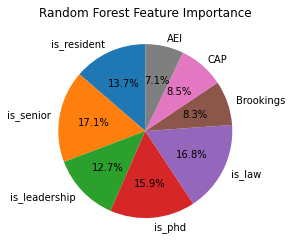

In [119]:
import matplotlib.pyplot as plt

plt.pie(clf.feature_importances_, labels=X.columns, autopct='%1.1f%%',
        normalize=None, 
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Random Forest Feature Importance')
plt.show()